# 데이터 스크래핑
데이터 스크래핑은 웹 사이트나 온라인 소스에서 원하는 데이터를 자동으로 추출하는 기술을 의미합니다. 이 과정을 통해 사람이 일일이 데이터를 수집하지 않고도, 프로그램을 이용하여 대량의 정보를 빠르게 모을 수 있습니다.

## robots.txt 파일
웹사이트의 루트 디렉토리에 위치한 텍스트 파일로, 웹 크롤러(검색 엔진 로봇)나 스크래퍼에게 어떤 페이지나 디렉토리를 크롤링해도 되는지, 또는 크롤링하지 말아야 하는지 지시하는 역할을 합니다.

* User-agent: 각 지시문이 적용되는 크롤러를 지정합니다.
* Disallow: 해당 경로에 있는 페이지나 디렉토리에 접근하지 말라는 지시입니다.
* Allow: Disallow 규칙이 적용되는 범위 중에서 특정 경로는 접근을 허용하는 경우 사용합니다.

## GET 요청
GET은 서버에서 데이터를 “요청”할 때 사용하는 메서드입니다. URL에 필요한 정보(쿼리 파라미터)를 포함하여 보내며, 주로 데이터를 조회할 때 사용됩니다.

* HTML 소스 가져오기

In [4]:
import requests

# 대상 사이트 URL
url = "http://example.com"

# GET 요청을 보내 HTML 소스 가져오기
response = requests.get(url)

# 응답 상태 코드 확인 (200이면 성공)
print("상태 코드:", response.status_code)

상태 코드: 200


* HTML 소스 출력하기

In [5]:
# HTML 소스 출력 (문자열 형태)
html_content = response.text
print("HTML 소스:\n", html_content)

HTML 소스:
 <!doctype html>
<html>
<head>
    <title>Example Domain</title>

    <meta charset="utf-8" />
    <meta http-equiv="Content-type" content="text/html; charset=utf-8" />
    <meta name="viewport" content="width=device-width, initial-scale=1" />
    <style type="text/css">
    body {
        background-color: #f0f0f2;
        margin: 0;
        padding: 0;
        font-family: -apple-system, system-ui, BlinkMacSystemFont, "Segoe UI", "Open Sans", "Helvetica Neue", Helvetica, Arial, sans-serif;
        
    }
    div {
        width: 600px;
        margin: 5em auto;
        padding: 2em;
        background-color: #fdfdff;
        border-radius: 0.5em;
        box-shadow: 2px 3px 7px 2px rgba(0,0,0,0.02);
    }
    a:link, a:visited {
        color: #38488f;
        text-decoration: none;
    }
    @media (max-width: 700px) {
        div {
            margin: 0 auto;
            width: auto;
        }
    }
    </style>    
</head>

<body>
<div>
    <h1>Example Domain</h1>
    <p>

* 간단한 데이터 추출 (예: 제목 추출)

In [6]:
from bs4 import BeautifulSoup

# BeautifulSoup 객체 생성 (HTML 파싱)
soup = BeautifulSoup(html_content, 'html.parser')

# <title> 태그의 내용 추출
page_title = soup.title.string
print("페이지 제목:", page_title)

# <h1> 태그의 내용 추출
h1_text = soup.find('h1').string
print("헤더 텍스트:", h1_text)

# 첫 번째 <p> 태그의 내용 추출
p_text = soup.find('p').string
print("본문 내용:", p_text)

페이지 제목: Example Domain
헤더 텍스트: Example Domain
본문 내용: This domain is for use in illustrative examples in documents. You may use this
    domain in literature without prior coordination or asking for permission.


## 연습문제
1. 로또 데이터를 모두 수집한 후, 번호별 출현횟수를 구하고 이를 시각화하세요.

In [291]:
# 데이터 스크래핑 : 인터넷에서 정보를 가져오는 기술
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import koreanize_matplotlib
import pickle

In [ ]:
def make_numbers(html):
    box = html.find('div', class_ = 'lottonum').find_all('span')
    del box[6:8]
    box

    numbers = []
    for i in box:
        numbers.append(int(i.text))
    return numbers
    
url = requests.get('https://search.daum.net/search?w=tot&DA=YZR&t__nil_searchbox=btn&q=%EB%A1%9C%EB%98%90')
total = []
for i in range(1, 1161):
    url = requests.get(f'https://search.daum.net/search?w=tot&rtmaxcoll=LOT&DA=LOT&q={i}%ED%9A%8C%20%EB%A1%9C%EB%98%90%EB%8B%B9%EC%B2%A8%EB%B2%88%ED%98%B8')
    html = BeautifulSoup(url.text)
    numbers = make_numbers(html)
    total.append(numbers)
    print(f'{i}회 로또 데이터 저장완료 : {numbers}')
    time.sleep(0.5)

pd.DataFrame(total).to_excel('로또넘버.xlsx')

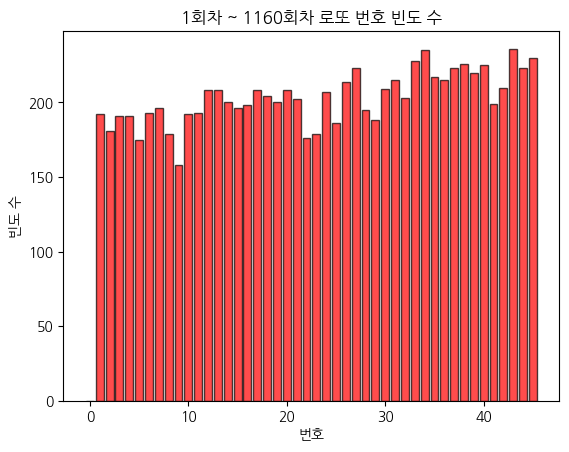

In [271]:
number_times = [i for i in range(0, 46)]

for number_list in total:
    for j in range(0, len(number_list)):
        number_times[number_list[j]] += 1
        
df = pd.DataFrame({'번호': range(0, 46), '빈도 수': number_times})
plt.bar(df['번호'], df['빈도 수'], alpha=0.7, color='red', edgecolor='black')
plt.xlabel('번호')
plt.ylabel('빈도 수')
plt.title('1회차 ~ 1160회차 로또 번호 빈도 수')
plt.show()

2. 최근 데이터를 기준으로, 번호별로 몇 주 동안 출현하지 않았는지 분석한 후, 제공된 Result.txt 파일과 동일한 형식의 파일을 생성하는 코드를 작성하세요.

In [332]:
# 방문 체크
visited = [False for i in range(0, 46)]
# 나온지 얼마나 됐는지
week_numbers = [0 for i in range(0, 46)]

trueNum = 0

for index, number_list in enumerate(total[::-1]):
    for j in number_list:
        if visited[j] == False:
            visited[j] = True
            week_numbers[j] = index
            trueNum += 1
            
        if trueNum == 45:
            break;

df = pd.DataFrame({
    '번호' : range(1, 46),
    '미출현주차' : week_numbers[1:]
})

df = df.sort_values(['미출현주차', '번호'], ascending=[False, True])

text_df = "1160회 기준 로또 번호별 연속 미출현 기간\n\n"

for _, row in df.iterrows():  # iterrows()를 사용하여 행 순회
    text_df += f"{row['번호']}번 : {row['미출현주차']}주 연속 미출현\n"

with open('Result.txt', "w", encoding="utf-8") as file:
    file.write(text_df)

3. 로또에서 6개의 번호 중 3개의 번호를 맞추면 5등에 당첨됩니다. 지금까지 한 번도 등장하지 않은 5등 번호 조합을 찾아, 그 개수를 출력하세요.

In [289]:
# 모든 5등 번호 조합에서 등장한 번호 조합 제거

# 모든 5등 번호 조합
all_5th = []
for i in range(1, 46):
    for j in range(i+1, 46):
        for k in range(j+1, 46):
            all_5th.append([i, j, k])

# 등장한 번호 조합, 중복 제거를 위해 Set
all_appear_5th = set()
for number_list in total:
    for i in range(0, 6):
        for j in range(i+1, 6):
            for k in range(j+1, 6):
                num1 = number_list[i]
                num2 = number_list[j]
                num3 = number_list[k]
                new_5th_combination = [num1, num2, num3]
                all_appear_5th.add(tuple(new_5th_combination))
                
print(len(all_5th) - len(all_appear_5th))

2681


Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45],
      dtype='int64', name='번호')